# ML Pipeline Demo
Machine Learning for Public Policy

Camilo Arias

pipeline functions in pipeline.py

In [19]:
%load_ext autoreload
%autoreload 2
import pipeline as ppln
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Importing data
#### Function to read from csv and function to download the ZIP bowndaries of Chicago

In [55]:
credit_df = ppln.load_credit_data('inputs/credit-data.csv')
zip_gdf = ppln.load_zipcode_area()

## Explore Data
#### Function to see basic summary statistics of all variables. 
Takes a list of columns and a list of percentiles. Default all columns and 0.25, 0.5 and 0.75 percentiles.

In [21]:
ppln.see_summary_stats(credit_df, ['PersonID', 'SeriousDlqin2yrs', 'age', 'zipcode'], [0.01, 0.25, 0.5, 0.75, 0.99])

            PersonID  SeriousDlqin2yrs           age       zipcode
count   41016.000000      41016.000000  41016.000000  41016.000000
mean   115800.154598          0.161400     51.683489  60623.824166
std     28112.723511          0.367904     14.746880     11.984357
min        22.000000          0.000000     21.000000  60601.000000
1%      10034.050000          0.000000     24.000000  60601.000000
25%    106539.750000          0.000000     41.000000  60618.000000
50%    119901.500000          0.000000     51.000000  60625.000000
75%    134698.250000          0.000000     62.000000  60629.000000
99%    149396.850000          1.000000     87.000000  60644.000000
max    149999.000000          1.000000    109.000000  60644.000000


In [22]:
ppln.see_summary_stats(credit_df, ['NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines'], [0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99])

       NumberOfOpenCreditLinesAndLoans  NumberRealEstateLoansOrLines
count                     41016.000000                  41016.000000
mean                          8.403477                      1.008801
std                           5.207324                      1.153826
min                           0.000000                      0.000000
1%                            0.000000                      0.000000
5%                            2.000000                      0.000000
25%                           5.000000                      0.000000
50%                           8.000000                      1.000000
75%                          11.000000                      2.000000
95%                          18.000000                      3.000000
99%                          25.000000                      5.000000
max                          56.000000                     32.000000


In [23]:
ppln.see_summary_stats(credit_df, ['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome'], [0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99])

       RevolvingUtilizationOfUnsecuredLines      DebtRatio  MonthlyIncome
count                          41016.000000   41016.000000   3.304200e+04
mean                               6.375870     331.458137   6.578996e+03
std                              221.618950    1296.109695   1.344683e+04
min                                0.000000       0.000000   0.000000e+00
1%                                 0.000000       0.000000   0.000000e+00
5%                                 0.000000       0.004569   1.325000e+03
25%                                0.034310       0.176375   3.333000e+03
50%                                0.189730       0.369736   5.250000e+03
75%                                0.667160       0.866471   8.055750e+03
95%                                1.000000    2337.000000   1.450000e+04
99%                                1.194705    4856.850000   2.500000e+04
max                            22000.000000  106885.000000   1.794060e+06


In [24]:
ppln.see_summary_stats(credit_df, ['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse'], [0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99])

       NumberOfTime30-59DaysPastDueNotWorse  NumberOfTimes90DaysLate  \
count                          41016.000000             41016.000000   
mean                               0.589233                 0.419592   
std                                5.205628                 5.190382   
min                                0.000000                 0.000000   
1%                                 0.000000                 0.000000   
5%                                 0.000000                 0.000000   
25%                                0.000000                 0.000000   
50%                                0.000000                 0.000000   
75%                                0.000000                 0.000000   
95%                                2.000000                 1.000000   
99%                                4.000000                 4.000000   
max                               98.000000                98.000000   

       NumberOfTime60-89DaysPastDueNotWorse  
count            

It possible to see that
-NumberOfTime60-89DaysPastDueNotWorse

-NumberOfTimes90DaysLate

-NumberOfTime30-59DaysPastDueNotWorse

-RevolvingUtilizationOfUnsecuredLines

-DebtRatio

-MonthlyIncome 

have some extreme high values, because the maximum value is extremelly higher compared to the 99th percentile.

#### Function to see histogram all variables.
Takes a list of columns and a dictionary of columns maped to percentile range to explude extreme values. Default all columns and all values.

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<Figure size 432x288 with 0 Axes>

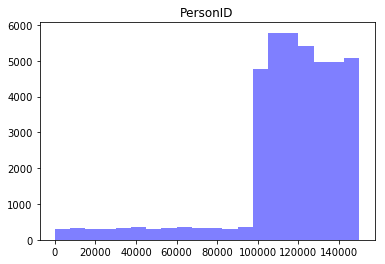

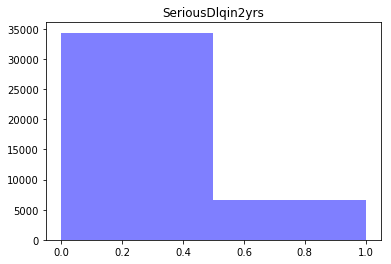

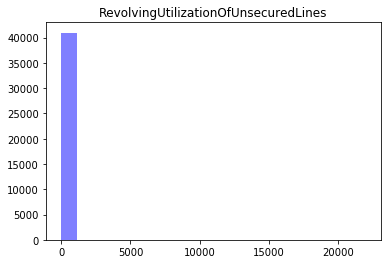

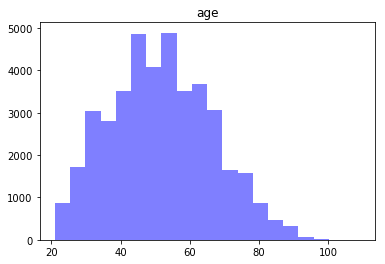

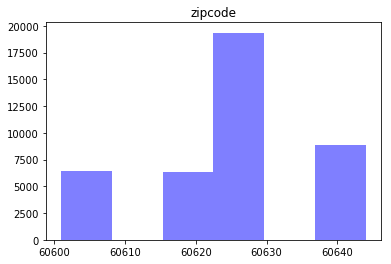

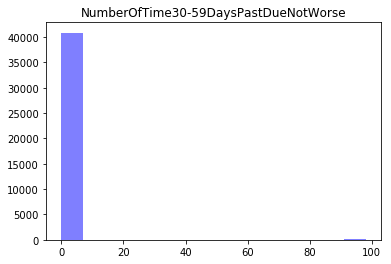

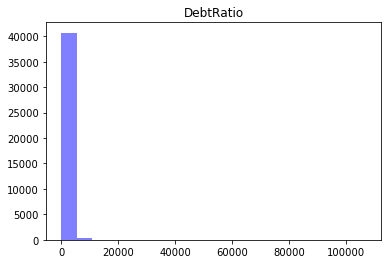

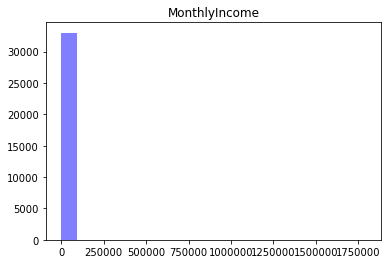

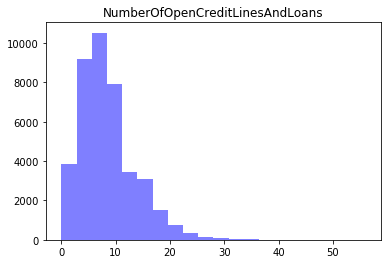

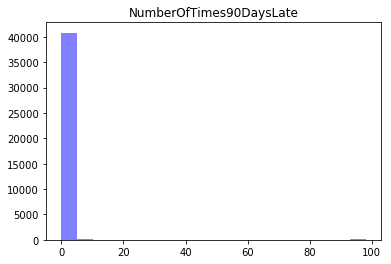

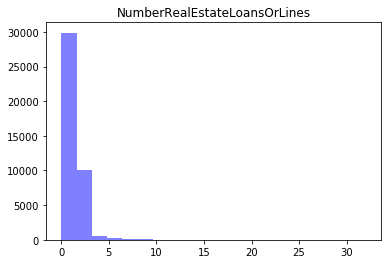

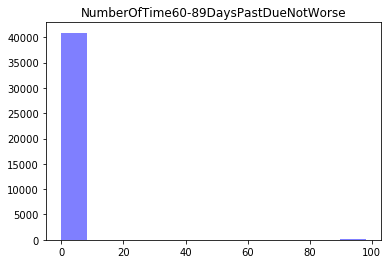

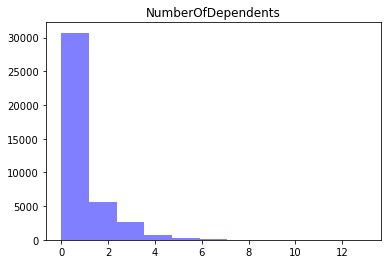

In [25]:
ppln.see_histograms(credit_df)

These histograms also evidence that the mentioned variables have some extreme high values. By specifying the restrict parameter, we can limit the extremelly high values of these variables and see their histograms.

<Figure size 432x288 with 0 Axes>

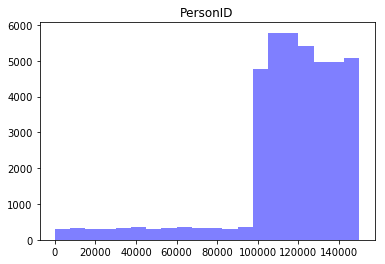

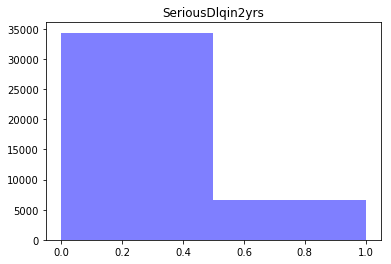

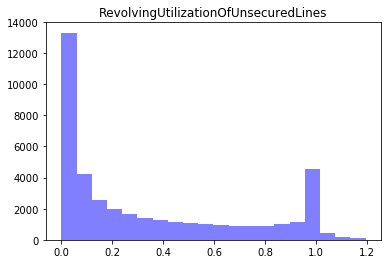

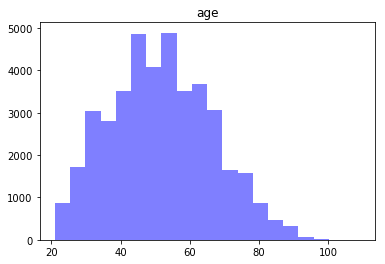

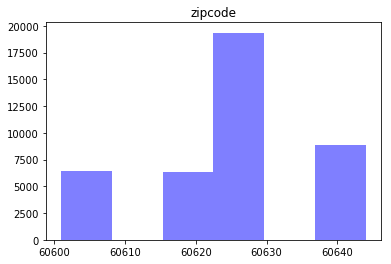

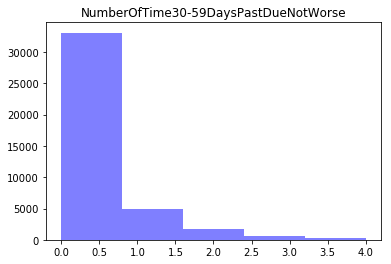

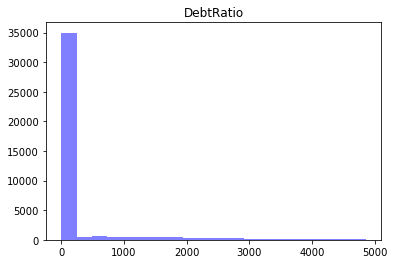

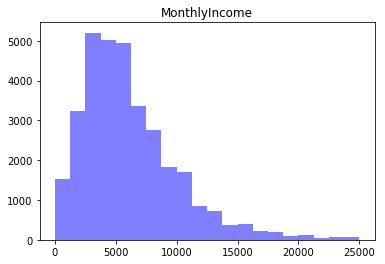

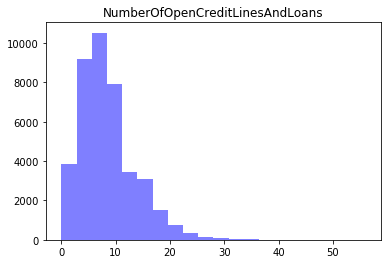

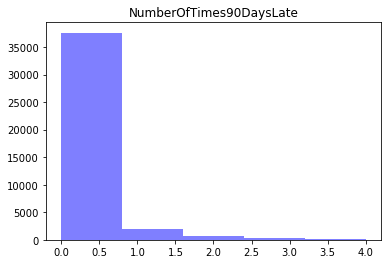

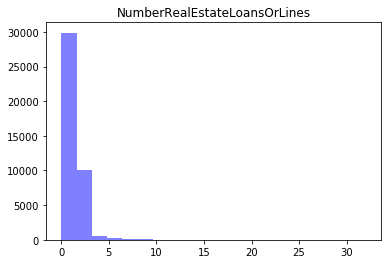

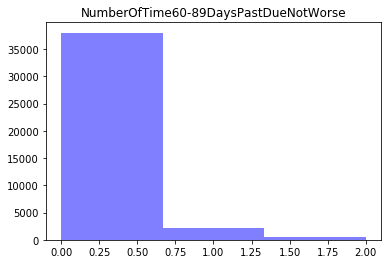

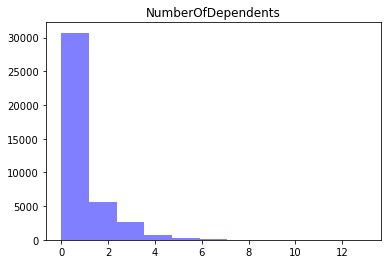

In [26]:
restrictions = {
    'NumberOfTime60-89DaysPastDueNotWorse': [0, 0.99],
    'NumberOfTimes90DaysLate': [0, 0.99],
    'NumberOfTime30-59DaysPastDueNotWorse': [0, 0.99],
    'RevolvingUtilizationOfUnsecuredLines': [0, 0.99],
    'DebtRatio': [0, 0.99],
    'MonthlyIncome': [0, 0.99]}
ppln.see_histograms(credit_df, restrict = restrictions)

This gave a much tighter histogram for the variables with the outliers. 

#### Function to create a new restricted dataframe.
Takes a dictionary of restrictions, like histograms function.

From the next descriptive functions, we will use a dataframe with the columns with outliers restricted to be under the 99 percentile.

In [27]:
credit_df_restrict = ppln.restrict_df(credit_df, restrict=restrictions)
ppln.see_summary_stats(credit_df_restrict, ppln.OUTCOME_VAR)
ppln.see_summary_stats(credit_df, ppln.OUTCOME_VAR)

count    39213.000000
mean         0.146482
std          0.353593
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: SeriousDlqin2yrs, dtype: float64
count    41016.000000
mean         0.161400
std          0.367904
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: SeriousDlqin2yrs, dtype: float64


 After restricting the dataframe, we lost 2803 observations, and the percentage of people who experienced 90 days past due delinquency or worse was reduced from 16% to 14.6%.

In [28]:
ppln.summary_by_objective(credit_df_restrict)

SeriousDlqin2yrs,0,1,perc diff
PersonID,123483.549284,75494.701079,-38.862544
RevolvingUtilizationOfUnsecuredLines,0.285303,0.667140,133.835685
age,52.844423,45.986943,-12.976734
zipcode,60624.060593,60622.580432,-0.002442
NumberOfTime30-59DaysPastDueNotWorse,0.177657,0.792479,346.072709
DebtRatio,266.878205,197.275259,-26.080416
MonthlyIncome,6241.114595,5351.716390,-14.250631
NumberOfOpenCreditLinesAndLoans,8.440706,7.988510,-5.357331
NumberOfTimes90DaysLate,0.039171,0.504875,1188.913022
NumberRealEstateLoansOrLines,0.987839,0.969359,-1.870766


This function is usefull to see how the average, or any other statistic of the values variables differ among the different values of the objective variable. Some interesting differences in terms of the population that experienced the severe past due delinquency are:

-RevolvingUtilizationOfUnsecuredLines, is on average 133% higher.

-MonthlyIncome, is 14% lower on average.

-NumberOfTime30-59DaysPastDueNotWorse, is 346% higher on average.	

-DebtRatio, is 26% lower on average.


-NumberOfTimes90DaysLate, is 1188% higher on average, from 0.04 times to 0.5 times.

-NumberOfTime60-89DaysPastDueNotWorse, is 735% higher on average, from 0.03 to 0.28 times.

#### Function to see scatterplot between two variables.
Takes:

-xvar

-yvar: Deffault autome variable

-colorcol: Col to add color.

-logx: Plot x values in log (Default False)

-logy: Plot y values in log (Default False)

-xjitter: Add randomness to x values to avoid overlaping (Default False)

-yjitter: Add randomness to y values to avoid overlaping (Default False)

<Figure size 432x288 with 0 Axes>

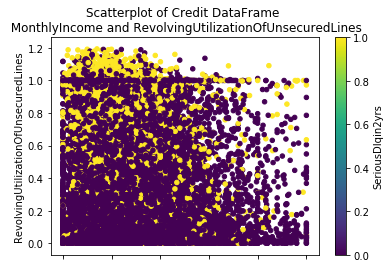

In [37]:
ppln.see_scatterplot(credit_df_restrict, 'MonthlyIncome', 'RevolvingUtilizationOfUnsecuredLines', ppln.OUTCOME_VAR)

This scatterplot shows the relation between between Monthly Income and Revolving Utilization of UnsecuredLInes, colored by the Serious Delinquency. There is no apparent relation between income and the utilization of unsecured lines, but there can be seen more occurences of the outcome variable under high levels of the utilization of unsecured lines, which was also seen in the past dummary table.

<Figure size 432x288 with 0 Axes>

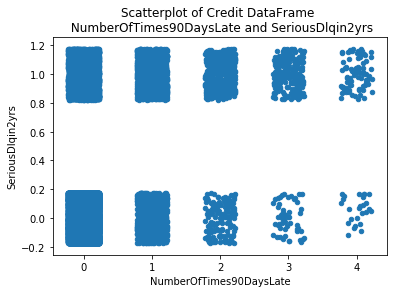

In [38]:
ppln.see_scatterplot(credit_df_restrict, 'NumberOfTimes90DaysLate', xjitter=True, yjitter=True)

This graph is a scatterplot between the number of times 90 days late and the outcome variable. Since both variables are categorical and have few values, the jitter parameter allows to see the relation. It is clear how one see more occurences of high levels of Number of Times 90 Days Late on the Serious Delinquency.

#### Function to map aggregated values by zip code.
This function uses the zip boundaries dataframe downloaded from the Chicago Open Data Portal, merges it with the credit data and produces a map based on the aggregation specified.

Takes:

-colorcol: Column to use to color the map. Default: Outcome Var

-funct: Function to aggregate by zipcode. Default: 'mean'

-count: True to color the map by frequency. Default: False


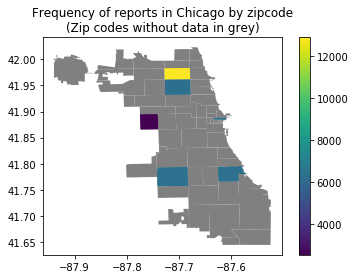

In [48]:
ppln.map(credit_df, zip_gdf, count = True)

This is a map colored by frequency. As the map shows, we do not have data of all Chicago. We only have data for 6 zip codes in the city. The Zipcode from which we have most of our observations is in the north part of the city.

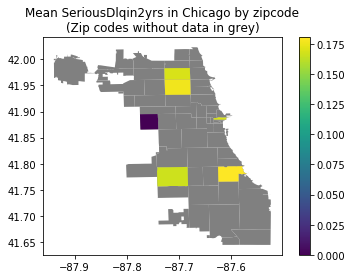

In [49]:
ppln.map(credit_df, zip_gdf)

This map is colores by the average value of Serious Delinquency. Since our data is not geographicaly representative of the city, I would be skeptical of any interpretation of this map.

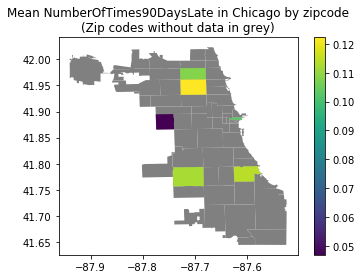

In [50]:
ppln.map(credit_df_restrict, zip_gdf, 'NumberOfTimes90DaysLate', 'mean')

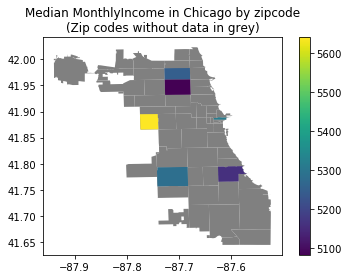

In [51]:
ppln.map(credit_df_restrict, zip_gdf, 'MonthlyIncome', 'median')

These are more examples of using the map function, with different columns and aggregation function.

## Pre-Process Data
#### Function fill NaN values. 
Takes a list of columns and function. Default all columns 'mean'.

In [58]:
credit_df.isna().sum()

PersonID                                   0
SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                        0
zipcode                                    0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                           7974
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      1037
dtype: int64

Monthly Income and Number of Dependents have 7974 and 1037 NaN values respectivelly

In [60]:
credit_df_nona = ppln.fillna(credit_df)
credit_df_nona.isna().sum()

PersonID                                0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
zipcode                                 0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

NaN values wele filled with the mean value of each column.